In [1]:
%load_ext autoreload
%autoreload 2
import pipeline
import pandas as pd
import warnings
warnings.simplefilter('ignore')
df = pipeline.read_load('/Users/erhla/Downloads/projects_2012_2013.csv')

In [2]:
df['date_posted'] = pd.to_datetime(df['date_posted'])
df['datefullyfunded'] = pd.to_datetime(df['datefullyfunded'])
df['days_to_fund'] = df['datefullyfunded'] - df['date_posted']
df['funded_within_60_days'] = pd.get_dummies(df['days_to_fund'] <= pd.Timedelta('60 days'), drop_first=True)

VARIABLE: total_price_including_optional_support 
 count    124976.000000
mean        654.011811
std        1098.015854
min          92.000000
25%         345.810000
50%         510.500000
75%         752.960000
max      164382.840000
Name: total_price_including_optional_support, dtype: float64 

VARIABLE: students_reached 
 count    124917.000000
mean         95.445760
std         163.481912
min           1.000000
25%          23.000000
50%          30.000000
75%         100.000000
max       12143.000000
Name: students_reached, dtype: float64 

VARIABLE: funded_within_60_days 
 count    124976.000000
mean          0.711865
std           0.452896
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: funded_within_60_days, dtype: float64 



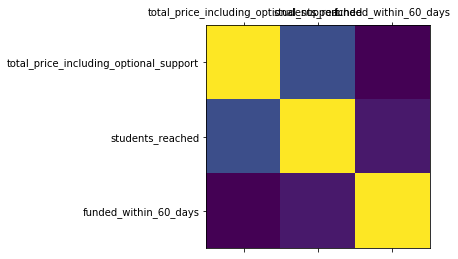

total_price_including_optional_support has possible outliers 402 

students_reached has possible outliers 993 



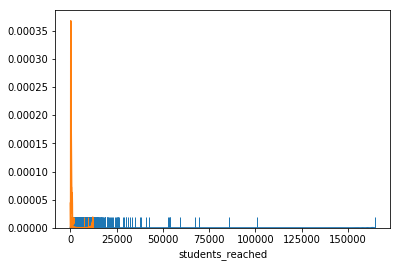

In [3]:
pipeline.explore(df, ['total_price_including_optional_support', 'students_reached', 'funded_within_60_days'])

In [4]:
df = pipeline.preprocess(df, ['students_reached'], ['primary_focus_area', 'resource_type', 'grade_level'])

53 nas filled for students_reached


In [5]:
feature_dict = {'students_reached': 'discretized',
                'total_price_including_optional_support': 'discretized',
                'school_charter': 'dummy',
                'school_magnet': 'dummy',
                'eligible_double_your_impact_match': 'dummy',
                'teacher_prefix': 'dummy',
                'poverty_level': 'dummy',
                'grade_level': 'dummy',
                'primary_focus_area': 'dummy',
                'resource_type': 'dummy'
               }
df, feature_ls = pipeline.generate_features(df, feature_dict, 10)

students_reached discretized
total_price_including_optional_support discretized
school_charter has values:  ['f' 't']
dummy created for school_charter
school_magnet has values:  ['f' 't']
dummy created for school_magnet
eligible_double_your_impact_match has values:  ['f' 't']
dummy created for eligible_double_your_impact_match
teacher_prefix has values:  ['Mrs.' 'Ms.' 'Mr.' 'Dr.']
target variable has more than two values, multiple dummies created
poverty_level has values:  ['highest poverty' 'high poverty' 'low poverty' 'moderate poverty']
target variable has more than two values, multiple dummies created
grade_level has values:  ['Grades PreK-2' 'Grades 3-5' 'Grades 9-12' 'Grades 6-8']
target variable has more than two values, multiple dummies created
primary_focus_area has values:  ['Math & Science' 'History & Civics' 'Literacy & Language'
 'Applied Learning' 'Music & The Arts' 'Health & Sports' 'Special Needs']
target variable has more than two values, multiple dummies created
resou

In [8]:
results = pipeline.build_models(df, feature_ls, 'funded_within_60_days')


06/01/2012 completed
12/01/2012 completed
06/01/2013 completed


In [46]:
results.head()

,0.01_precision,0.01_recall,0.02_precision,0.02_recall,0.05_precision,0.05_recall,0.1_precision,0.1_recall,0.2_precision,0.2_recall,0.3_precision,0.3_recall,0.5_precision,0.5_recall,auc_roc,baseline,parameters,pr_curve,split_date,type
0,1.0,0.000133,1.0,0.000267,1.0,0.000667,0.966667,0.001290,0.966667,0.002579,0.978022,0.003958,0.973510,0.006537,0.657127,0.740297,"{'max_depth': 5, 'min_samples_split': 10, 'n_e...","([0.7402969351812226, 0.740328581305765, 0.740...",06/01/2012,RF
1,1.0,0.000133,1.0,0.000267,1.0,0.000667,1.000000,0.001334,0.950000,0.002535,0.945055,0.003824,0.953642,0.006403,0.658748,0.740297,"{'max_depth': 5, 'min_samples_split': 10, 'n_e...","([0.7403213062944429, 0.7403127572016461, 0.74...",06/01/2012,RF
2,1.0,0.000133,1.0,0.000267,1.0,0.000667,0.966667,0.001290,0.933333,0.002490,0.956044,0.003869,0.947020,0.006359,0.624133,0.740297,"{'max_depth': 20, 'min_samples_split': 10, 'n_...","([0.7403213062944429, 0.7403529566706176, 0.74...",06/01/2012,RF
3,1.0,0.000133,1.0,0.000267,1.0,0.000667,1.000000,0.001334,0.983333,0.002624,0.956044,0.003869,0.940397,0.006314,0.638314,0.740297,"{'max_depth': 20, 'min_samples_split': 10, 'n_...","([0.7402969351812226, 0.7402798353909466, 0.74...",06/01/2012,RF
4,1.0,0.000133,1.0,0.000267,1.0,0.000667,0.966667,0.001290,0.933333,0.002490,0.945055,0.003824,0.940397,0.006314,0.659166,0.740297,"{'C': 0.5, 'max_iter': 5000, 'penalty': 'l2'}","([0.7402969351812226, 0.7402798353909466, 0.74...",06/01/2012,LR


# Predicting Donorschoose Funding

This analysis sets out to predict which donorchoose projects are at risk of not being funded within 60 days of their initial posting ('target outcome'). Utilizing a dataset on 2012 and 2013 projects, this analysis analyzes the target outcome with respect to the following factors:

- number of students reached
- total price
- charter school (Y/N)
- magnet school (Y/N)
- match eligible (Y/N)
- teacher prefix (proxy for gender/education)
- school poverty level
- project grade level
- primary focus area (e.g. History)
- planned expenditures (e.g. Supplies, field trips...)

## Best on the Metrics...

To promote model strength, three different temporal slices of the dataset were used. Each one of these slices has a different *baseline* (which is the fraction of projects which were funded within 60 days). The baseline is an important factor to compare how much better our predications are versus a model which always guesses yes.

The baselines for the slices are as follows:

- 1st half of 2012: 0.74
- all of 2012: 0.70
- 2012 and 1st half of 2013: 0.71

### Metric: Precision

Precision is the ratio of correctly predicted values to all values predicted correct. Higher precision means fewer values predicted incorrectly. For the suite of models ran in this analysis, 4 models scored higher than 98% precision at the 50% threshold; 3 were the gradient boosted model and 1 was the random forests model. To score higher than 98% precision means that fewer than 2% of projects predicted to not be funded within 60 days by the model were actually funded.

### Metric: Recall

Recall is the ratio of correctly predicted values to all values which should have been predicted correct. Higher recall means a higher share of values predicted correct. 4 out of the 5 models with the highest recall at the 50% threshold were gradient boosted models.

### Metric: Area Under the Curve

This metric compares the true positive rate (values predicted true and true) to the false positive rate (values predicted true, but actually false). A model which predicted randomly would have a Area Under the Curve (AUC) of 0.5 The highest scoring models had AUCs around 0.67 and were gradient boosted models.

### Metric: Over Time

Do some models perform better or worse as the time slice changes? Well, in general most models improved with more data. This is highlighted as an area for further study, however, as shifts in the economy or other external factors may affect how often projects are funded and require the models to be more responsive to the most recent data.

## Identifying high risk projects

Recommendation: For a project looking to identify 5% of projects as at the highest risk of not getting fully funded in 60 days, the selected model should maximize precision to ensure that all identified projects are actually in need of intervention. With this in mind, this report recommends deploying the gradient boosted following model:



In [45]:
results.loc[results['0.5_precision'].idxmax(axis=1)]

0.01_precision                                                    1
0.01_recall                                             0.000132776
0.02_precision                                                    1
0.02_recall                                             0.000265551
0.05_precision                                             0.952381
0.05_recall                                             0.000663878
0.1_precision                                               0.97619
0.1_recall                                               0.00136095
0.2_precision                                              0.988095
0.2_recall                                                0.0027551
0.3_precision                                              0.992126
0.3_recall                                               0.00418243
0.5_precision                                              0.985849
0.5_recall                                               0.00693753
auc_roc                                         